In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [56]:
df = pd.read_csv('heart.csv')

In [57]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [58]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [59]:
df.shape

(918, 12)

In [60]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [61]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [62]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [63]:
df.drop('RestingBP', axis = 1 , inplace=True)
df.drop('FastingBS', axis = 1, inplace = True)
df.drop('Oldpeak', axis = 1, inplace = True)
df.drop('HeartDisease', axis = 1, inplace = True)

In [64]:
df.corr()

,Age,Cholesterol,MaxHR
Age,1.000000,-0.095282,-0.382045
Cholesterol,-0.095282,1.000000,0.235792
MaxHR,-0.382045,0.235792,1.000000


<AxesSubplot: >

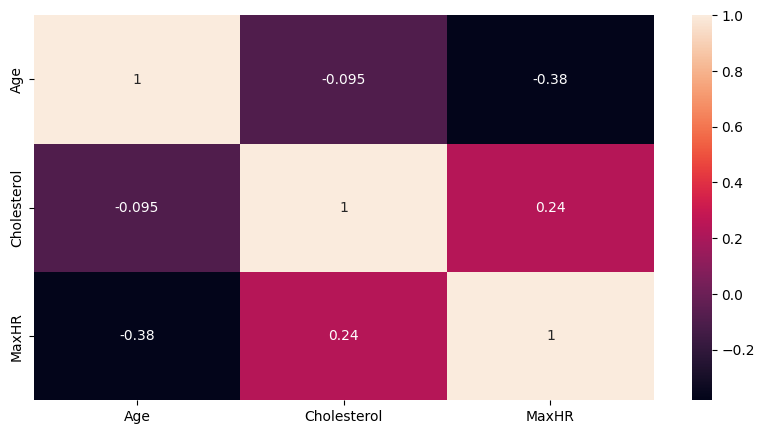

In [65]:
sns.heatmap(df.corr(), annot=True)

In [66]:
df.rename(columns={'Cholesterol' : 'cholesterol', 'MaxHR' : 'heart_rate'}, inplace=True)

In [67]:
df = df[['cholesterol', 'heart_rate']]

In [68]:
df.head()

,cholesterol,heart_rate
0,289,172
1,180,156
2,283,98
3,214,108
4,195,122


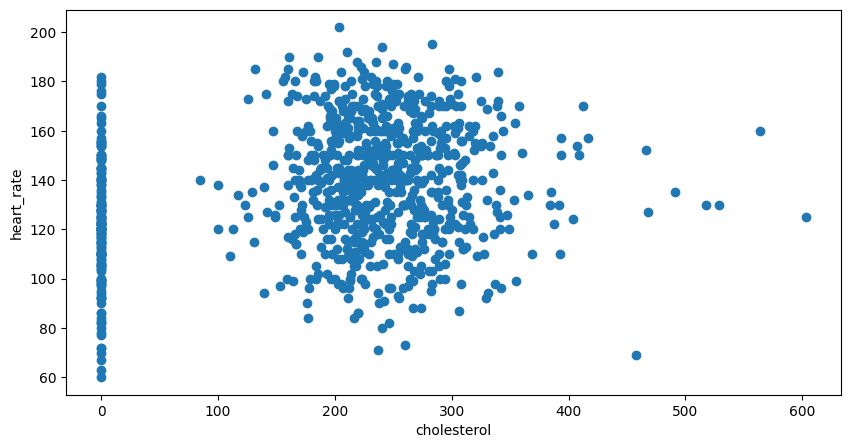

In [69]:
plt.scatter(df['cholesterol'], df['heart_rate'])
plt.xlabel('cholesterol')
plt.ylabel('heart_rate')
plt.show()

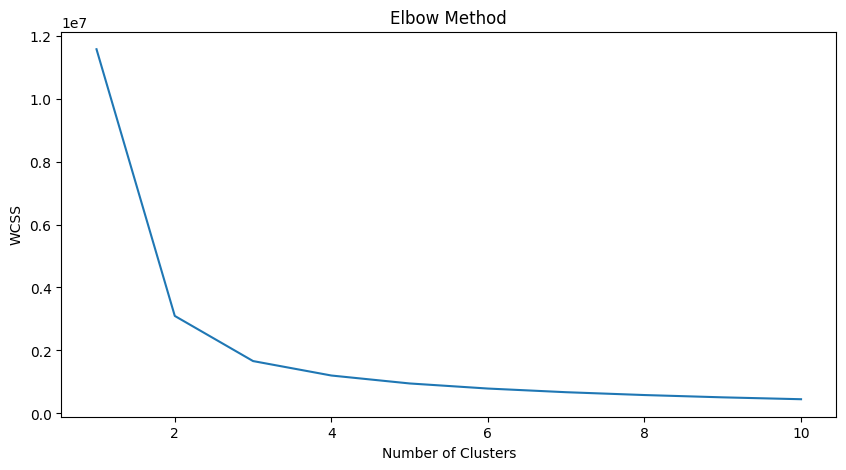

In [70]:
wcss = []
for i in range(1, 11):
    kMeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kMeans.fit(df)
    wcss.append(kMeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [71]:
kMeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kMeans = kMeans.fit_predict(df)

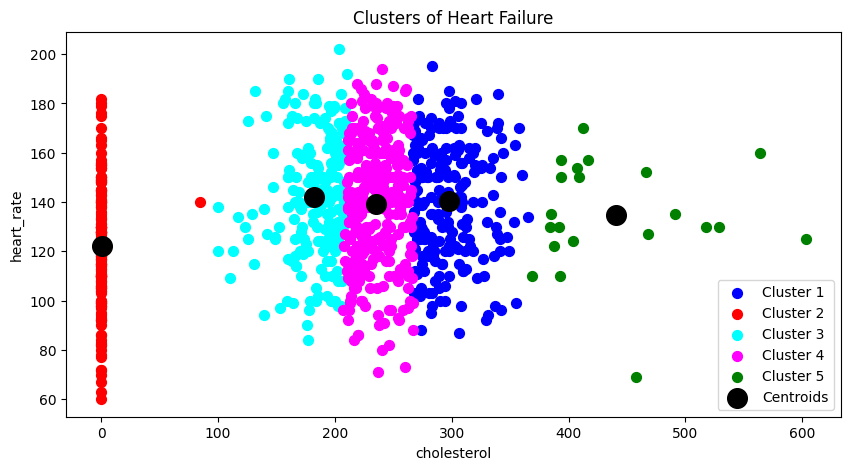

In [72]:
plt.scatter(df[y_kMeans == 0]['cholesterol'], df[y_kMeans == 0]['heart_rate'], s=50, c='blue', label='Cluster 1')
plt.scatter(df[y_kMeans == 1]['cholesterol'], df[y_kMeans == 1]['heart_rate'], s=50, c='red', label='Cluster 2')
plt.scatter(df[y_kMeans == 2]['cholesterol'], df[y_kMeans == 2]['heart_rate'], s=50, c='cyan', label='Cluster 3')
plt.scatter(df[y_kMeans == 3]['cholesterol'], df[y_kMeans == 3]['heart_rate'], s=50, c='magenta', label='Cluster 4')
plt.scatter(df[y_kMeans == 4]['cholesterol'], df[y_kMeans == 4]['heart_rate'], s=50, c='green', label='Cluster 5')
plt.scatter(kMeans.cluster_centers_[:, 0], kMeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('Clusters of Heart Failure')
plt.xlabel('cholesterol')
plt.ylabel('heart_rate')
plt.legend()
plt.show()

In [73]:
df['Cluster'] = y_kMeans

In [74]:
df.head()

,cholesterol,heart_rate,Cluster
0,289,172,0
1,180,156,2
2,283,98,0
3,214,108,3
4,195,122,2


In [75]:
df['Cluster'].dtype

dtype('int32')

In [76]:
df['Cluster'].unique()

array([0, 2, 3, 4, 1], dtype=int32)

In [ ]:
import pickle
pickle.dump(kMeans, open('model.pkl', 'wb'))